1. Importing Data

In [2]:
import pandas as pd
data = pd.read_csv("diabetes.csv")

C:\Users\tadej\AppData\Local\Temp\ipykernel_17908\1003371688.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [4]:
independent_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']


2. Handling Missing Data

In [5]:
# Check for zero values in specific columns
import numpy as np
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
zero_counts = (data[columns_with_zeros] == 0).sum()
print(zero_counts)

Glucose            5
BloodPressure     35
SkinThickness    227
BMI               11
dtype: int64


In [6]:
# Replace zero values with NaN in specific columns
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)
# Impute missing values with mean of the column
data.fillna(data.mean(), inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,50,1
1,1,85.0,66.0,29.00000,0,26.6,31,0
2,8,183.0,64.0,29.15342,0,23.3,32,1
3,1,89.0,66.0,23.00000,94,28.1,21,0
4,0,137.0,40.0,35.00000,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,63,0
764,2,122.0,70.0,27.00000,0,36.8,27,0
765,5,121.0,72.0,23.00000,112,26.2,30,0
766,1,126.0,60.0,29.15342,0,30.1,47,1


In [7]:
#Round figures back to whole numbers
data['Glucose'] = data['Glucose'].round().astype(int)
data['BloodPressure'] = data['BloodPressure'].round().astype(int)
data['SkinThickness'] = data['SkinThickness'].round().astype(int)

3. Multivariate Analysis

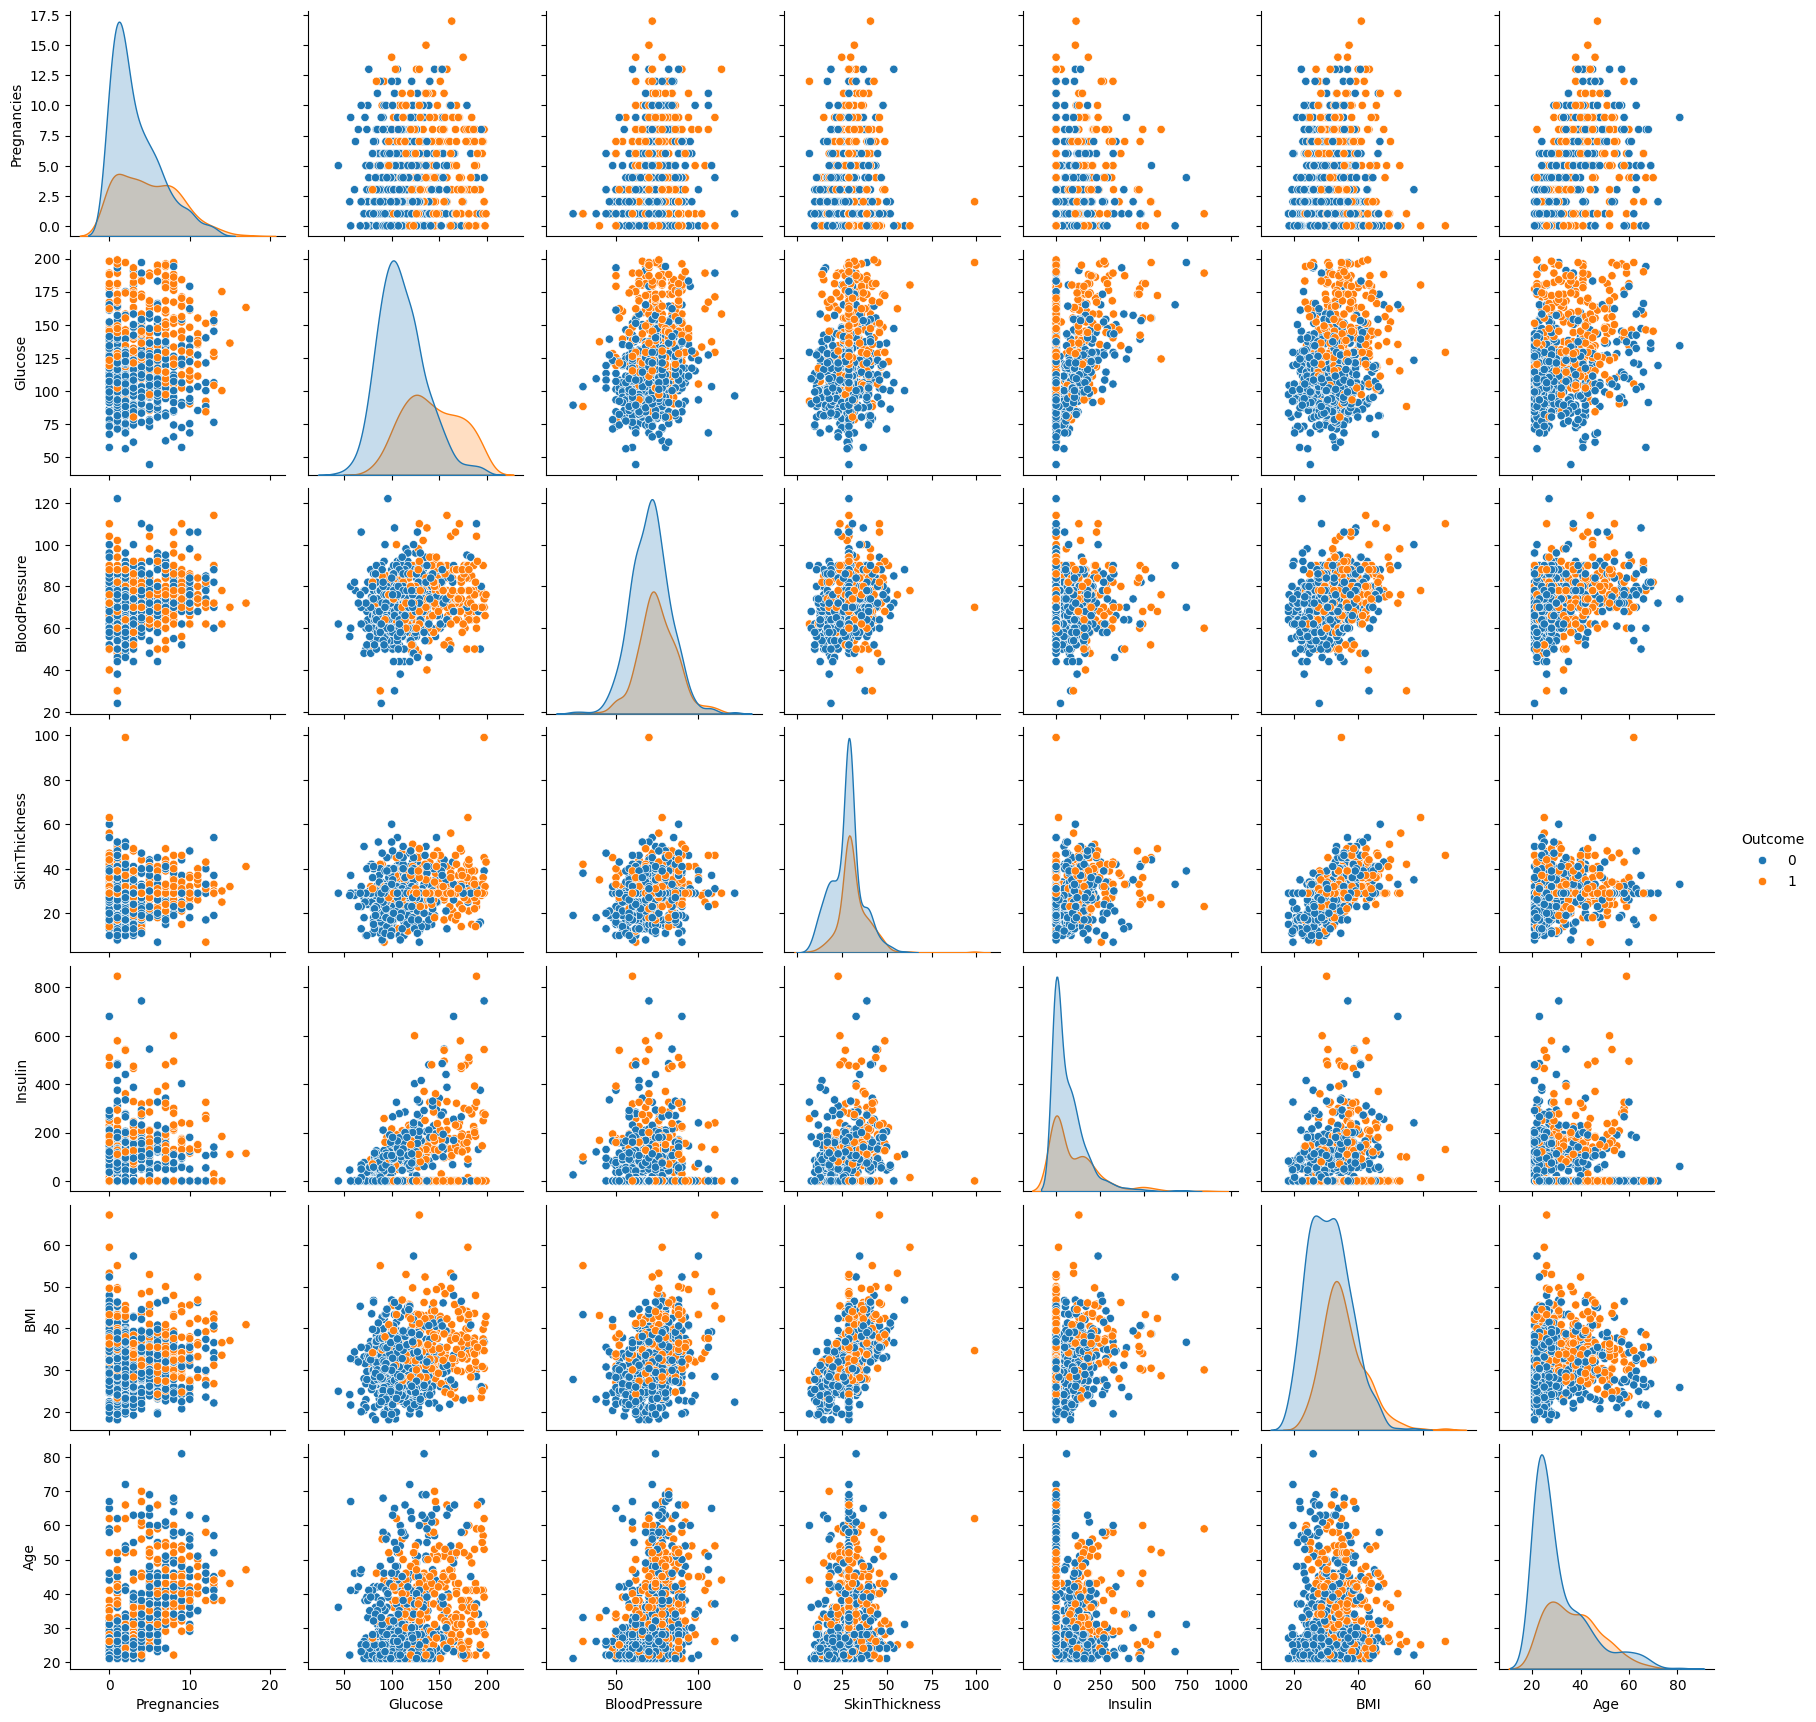

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#Pairplot to visualize relationships between independent variables
sns.pairplot(data, hue='Outcome')
plt.show()

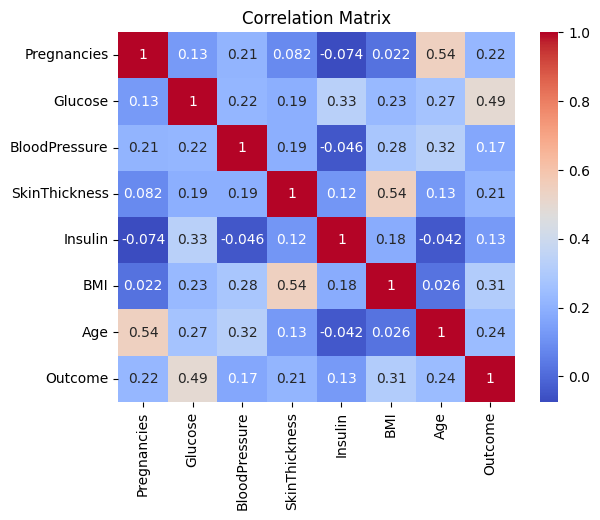

In [9]:
#Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

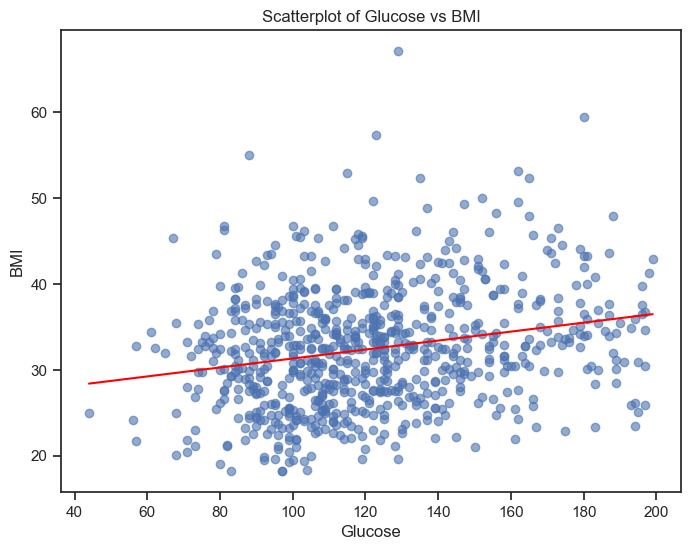

In [14]:
#Check relationtship for each indepenent variable pair

# Scatterplot of BMi vs glucose
plt.figure(figsize=(8, 6))
plt.scatter(data['Glucose'], data['BMI'], alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatterplot of BMI vs Glucose')

# Add linear regression line
poly_fit = np.polyfit(data['Glucose'], data['BMI'], 1)
plt.plot(np.unique(data['Glucose']), np.poly1d(poly_fit)(np.unique(data['Glucose'])), color='red')

plt.show()

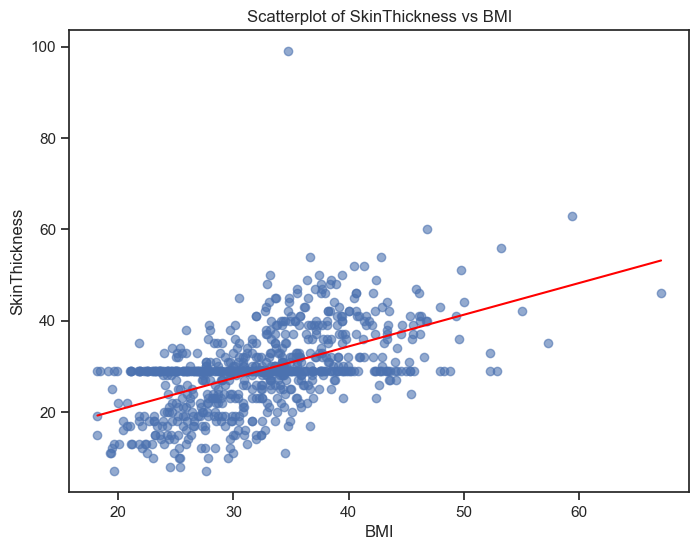

In [15]:
# Scatterplot of SkinThickness vs BMI
plt.figure(figsize=(8, 6))
plt.scatter(data['BMI'], data['SkinThickness'], alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('Scatterplot of SkinThickness vs BMI')

# Add linear regression line
poly_fit = np.polyfit(data['BMI'], data['SkinThickness'], 1)
plt.plot(np.unique(data['BMI']), np.poly1d(poly_fit)(np.unique(data['BMI'])), color='red')

plt.show()

In [ ]:
# Scatterplot of Insulin vs BloodPressure
plt.figure(figsize=(8, 6))
plt.scatter(data['BloodPressure'], data['Insulin'], alpha=0.6)
plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.title('Scatterplot of Insulin vs BloodPressure')

# Add linear regression line
poly_fit = np.polyfit(data['BloodPressure'], data['Insulin'], 1)
plt.plot(np.unique(data['BloodPressure']), np.poly1d(poly_fit)(np.unique(data['BloodPressure'])), color='red')

plt.show()